# MTH 651: Advanced Numerical Analysis

## Lecture 9

### Topics

* Construction of Finite Element Spaces

#### Textbook references

Sections 3.1, 3.2, 3.3

### Finite Element Spaces on Meshes

We saw earlier how to define **finite elements** of arbitrary polynomial degree $k$ on a triangle $K \subset \mathbb{R}^2$.

In our construction, we defined **nodal variables** $N_i : u \mapsto u(x_i)$ at **nodal points** (or just **nodes**) $x_i$.
The $\binom{k+2}{2}$ points $x_i$ are chosen as follows:

* One point at each vertex
* $(k-1)$ points on the interior of each edge
* The remaining points are in the interior on the triangle (arranged inductively)

We proved that $\{ N_i \}$ is a basis for $\mathcal{P}_k(K)'$, and therefore there exists a **dual basis** $\{ \phi_i \}$ spanning $\mathcal{P}_k(K)$ such that
$$
    N_j(\phi_i) = \phi_i(x_j) = \delta_{ij}.
$$
In other words, every bivariate polynomial of degree at most $k$ can be **uniquely identified** by its point values at the nodal points, and, conversely, there exists a unique **interpolating polynomial** that takes on given point values at the nodes.

#### "Gluing Together" Finite Elements

Consider a triangular mesh.
By this we mean a collection of triangles such that no vertex lies in the interior of any other edge.
For example, we could think about the triangular mesh shown below.

In [1]:
%load_ext tikzmagic

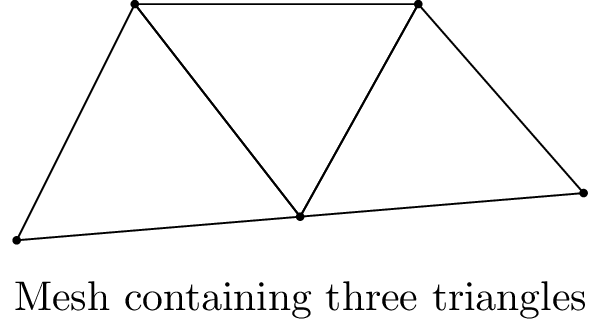

In [2]:
%%tikz -sc 2 -s 600,600

\usetikzlibrary{calc}


\coordinate (A) at (0,0);
\coordinate (B) at (1.2,0.1);
\coordinate (C) at (0.5,1);
\coordinate (D) at (1.7, 1);
\coordinate (E) at (2.4, 0.2);

\tikzset{dot/.style={circle,inner sep=0pt, minimum size=2pt, fill=black}}

\draw (A) -- (B) -- (C) -- cycle;
\draw (B) -- (D) -- (C) -- cycle;
\draw (B) -- (E) -- (D) -- cycle;

\foreach \COORD in {(A), (B), (C), (D), (E)}
    \node [dot] at \COORD {};

\node [yshift=-20pt] at (B) {Mesh containing three triangles};


Then, then, we consider **piecewise polynomials** defined in terms of the nodal variables on the mesh.
Since each edge has $(k+1)$ nodes (including the vertices), a degree-$k$ polynomial is uniquely determined on the edge, and so nodal values determine a unique, **continuous** piecewise polynomial function.

_(Execute the following cells to use with Google Colab)_

In [3]:
%pip install mfem
%pip install glvis

In [4]:
# needed for glvis widget
from google.colab import output
output.enable_custom_widget_manager()

In [5]:
import mfem.ser as mfem
from glvis import glvis

In [6]:
# create simple mesh by gluing together some triangles
mesh = mfem.Mesh(4, 4, "TRIANGLE")
glvis(mesh)

glvis(data_str='MFEM mesh v1.0\n\n#\n# MFEM Geometry Types (see mesh/geom.hpp):\n#\n# POINT       = 0\n# SEGME…

In [7]:
# Choose the polynomial degree k, we use k = 1 here
order_k = 1

# Create a finite element space defined on this mesh
fe_collection = mfem.H1_FECollection(order_k, mesh.Dimension())
fe_space = mfem.FiniteElementSpace(mesh, fe_collection)

We now define a **grid function** on this space.
A grid function is a function $u : \Omega \to \mathbb{R}$ such that for every triangle $K \in \mathcal{T}$, we have
$$
    u|_K \in \mathcal{P}(K)
$$

In [8]:
u = mfem.GridFunction(fe_space)

Define some function, could be anything...

In [9]:
from math import cos, exp, sin

class f(mfem.PyCoefficient):
    def EvalValue(self, xvec):
        x = xvec[0]
        y = xvec[1]
        return exp(0.1*sin(5.1*x - 6.2*y) + 0.3*cos(4.3*x +3.4*y))

In [10]:
u.ProjectCoefficient(f())

In [11]:
glvis((mesh, u))

glvis(data_str='MFEM mesh v1.0\n\n#\n# MFEM Geometry Types (see mesh/geom.hpp):\n#\n# POINT       = 0\n# SEGME…

We can get a better approximation by **refining** the mesh (this is called $h$-refinement, because $h$ is used to stand for the mesh size).

In [12]:
# create simple mesh by gluing together some triangles
mesh = mfem.Mesh(16, 16, "TRIANGLE")
order_k = 1
fe_collection = mfem.H1_FECollection(order_k, mesh.Dimension())
fe_space = mfem.FiniteElementSpace(mesh, fe_collection)
u = mfem.GridFunction(fe_space)
u.ProjectCoefficient(f())
glvis((mesh, u))

glvis(data_str='MFEM mesh v1.0\n\n#\n# MFEM Geometry Types (see mesh/geom.hpp):\n#\n# POINT       = 0\n# SEGME…

Similarly, we can get a better approximation by **increasing the polynomial degree** (this is called $p$-refinement, because $p$ is typically used to stand for the polynomial degree)

In [13]:
# create simple mesh by gluing together some triangles
mesh = mfem.Mesh(4, 4, "TRIANGLE")
order_k = 4
fe_collection = mfem.H1_FECollection(order_k, mesh.Dimension())
fe_space = mfem.FiniteElementSpace(mesh, fe_collection)
u = mfem.GridFunction(fe_space)
u.ProjectCoefficient(f())
glvis((mesh, u))

glvis(data_str='MFEM mesh v1.0\n\n#\n# MFEM Geometry Types (see mesh/geom.hpp):\n#\n# POINT       = 0\n# SEGME…

In [14]:
from urllib.request import urlopen
def make_tmp_mesh_from_url(url):
    mesh_data = urlopen(url).read()
    mesh_f = open("tmp.mesh", "w")
    mesh_f.write(mesh_data.decode())
    mesh_f.close()

In [15]:
make_tmp_mesh_from_url("https://github.com/pazner/mth-651/raw/main/data/meshes/square-disc.mesh")
mesh = mfem.Mesh("tmp.mesh")
order_k = 4
fe_collection = mfem.H1_FECollection(order_k, mesh.Dimension())
fe_space = mfem.FiniteElementSpace(mesh, fe_collection)
u = mfem.GridFunction(fe_space)
u.ProjectCoefficient(f())
glvis((mesh, u))

glvis(data_str='MFEM mesh v1.0\n\n#\n# MFEM Geometry Types (see mesh/geom.hpp):\n#\n# POINT       = 0\n# SEGME…

In [16]:
make_tmp_mesh_from_url("https://github.com/pazner/mth-651/raw/main/data/meshes/dolphin.mesh")
mesh = mfem.Mesh("tmp.mesh")
order_k = 4
fe_collection = mfem.H1_FECollection(order_k, mesh.Dimension())
fe_space = mfem.FiniteElementSpace(mesh, fe_collection)
u = mfem.GridFunction(fe_space)
u.ProjectCoefficient(f())
glvis((mesh, u))

glvis(data_str='MFEM mesh v1.0\n\n#\n# MFEM Geometry Types (see mesh/geom.hpp):\n#\n# POINT       = 0\n# SEGME…

#### Local Interpolant

What exactly is `ProjectCoefficient` doing in the above examples?

What is the approximation procedure used to produce $u_h \in V_h$ approximating the given function $f$?

In these cases, $u_h$ is given by the **global interpolant**.
Before we can define the global interpolant, we need to define the **local interpolant**.

Let $(K, \mathcal{P}, \mathcal{N})$ be a finite element.
Let $\{ \phi_i \}$ be the basis dual to $\mathcal{N} = \{ N_1, N_2, \ldots, N_n \}$.

For any $v$ for which all $N_i$ are defined (e.g. if the nodal variables $N_i$ represent evaluation at nodal points, take $v \in C^0(\Omega)$), then define the **local interpolant**
$$
    \mathcal{I}_K(v) := \sum_i N_i(v) \phi_i
$$

> **_PROPOSITION:_** $\mathcal{I}_K$ is linear.

> _Proof._ Exercise.

> **_PROPOSITION:_** $N_i( \mathcal{I}_K (v)) = N_i(v)$ for all $i$

> **_PROPOSITION:_** For all $u \in \mathcal{P}$, $I_K(u) = u$. In particular, $\mathcal{I}_K \circ \mathcal{I}_K = \mathcal{I}_K$.

#### Global Interpolant

Let $\Omega$ be a domain, and let $\mathcal{T} = \{ K \}$ be a mesh of the domain.

Let $v : C^0(\Omega) \to \mathbb{R}$.

Then, the **global interpolant** of $v$ is characterized by
$$
    \mathcal{I}_{\mathcal{T}}(v)|_K = \mathcal{I}_K(v) \quad \text{for all $K \in \mathcal{T}$}
$$

> **_PROPOSITION:_** For the Lagrange elements, $\mathcal{I}_{\mathcal{T}}(v) \in C^0(\Omega)$.

#### Global degrees of freedom

The nodal variables over all the elements in the mesh _uniquely determine_ a finite element function.
In other words, a finite element function ("grid function" in MFEM parlance) is determined by a finite number of "degrees of freedom", and such a function can be represented as a vector of such values.

Let $N_1, N_2, \ldots, N_n$ be an enumeration of the **unique** nodal variables (i.e. "combining" overlapping nodes).

Let $(u_1, u_2, \ldots, u_n)$ be a vector.
This defines a function $u_h$ satisfying
$$
    N_i(u_h) = u_i.
$$

The standard basis vectors $(1, 0, \ldots, 0)$, $(0, 1, 0, \ldots, 0)$, etc. induce basis functions $\phi_i$ satisfying
$$
    N_j(\phi_i) = \delta_{ij}
$$

These **global basis functions** are obtained by combining the **local basis functions** that share **common nodes**.

In [17]:
mesh = mfem.Mesh(2, 2, "TRIANGLE")
order_k = 1
fe_collection = mfem.H1_FECollection(order_k, mesh.Dimension())
fe_space = mfem.FiniteElementSpace(mesh, fe_collection)
u = mfem.GridFunction(fe_space)
glvis(mesh)

glvis(data_str='MFEM mesh v1.0\n\n#\n# MFEM Geometry Types (see mesh/geom.hpp):\n#\n# POINT       = 0\n# SEGME…

In [18]:
u.Assign(0.0)
u[4] = 1.0
glvis((mesh, u))

glvis(data_str='MFEM mesh v1.0\n\n#\n# MFEM Geometry Types (see mesh/geom.hpp):\n#\n# POINT       = 0\n# SEGME…

In [19]:
mesh = mfem.Mesh(2, 2, "TRIANGLE")
order_k = 1
fe_collection = mfem.H1_FECollection(order_k, mesh.Dimension())
fe_space = mfem.FiniteElementSpace(mesh, fe_collection)
u = mfem.GridFunction(fe_space)
u.ProjectCoefficient(f())
glvis((mesh, u))

glvis(data_str='MFEM mesh v1.0\n\n#\n# MFEM Geometry Types (see mesh/geom.hpp):\n#\n# POINT       = 0\n# SEGME…

In [20]:
for x in u.GetDataArray():
    print(x)

1.3498588075760032
0.8972336890849048
0.8083006324025056
0.9580920552697224
0.7557169024179107
1.4607950301026116
0.7544769754876963
1.312052358547997
0.9578073881900919


In [21]:
coords = [
    [0.0, 0.0],
    [0.5, 0.0],
    [1.0, 0.0],
    [0.0, 0.5],
    [0.5, 0.5],
    [1.0, 0.5],
    [0.0, 1.0],
    [0.5, 1.0],
    [1.0, 1.0]
]

for coord in coords:
    print(f().EvalValue(coord))

1.3498588075760032
0.8972336890849048
0.8083006324025056
0.9580920552697224
0.7557169024179107
1.4607950301026116
0.7544769754876963
1.312052358547997
0.9578073881900919
